## importing libraries 


In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
loan_data_backup = pd.read_csv('E:/Udemy/Credit Risk modeling/loan_data_2007_2014.csv')

D:\Program Files\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
loan_data = loan_data_backup.copy()

In [4]:
loan_data

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.00000,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.00000,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.00000,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.00000,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.00000,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,1075269,1311441,5000,5000,5000.00000,36 months,7.90,156.46,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,6,1069639,1304742,7000,7000,7000.00000,60 months,15.96,170.08,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,7,1072053,1288686,3000,3000,3000.00000,36 months,18.64,109.43,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8,1071795,1306957,5600,5600,5600.00000,60 months,21.28,152.39,F,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9,1071570,1306721,5375,5375,5350.00000,60 months,12.69,121.45,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
pd.options.display.max_columns = None

In [6]:
loan_data = loan_data.drop(loan_data.columns[0] ,axis=1)

In [7]:
loan_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 74 columns):
id                             466285 non-null int64
member_id                      466285 non-null int64
loan_amnt                      466285 non-null int64
funded_amnt                    466285 non-null int64
funded_amnt_inv                466285 non-null float64
term                           466285 non-null object
int_rate                       466285 non-null float64
installment                    466285 non-null float64
grade                          466285 non-null object
sub_grade                      466285 non-null object
emp_title                      438697 non-null object
emp_length                     445277 non-null object
home_ownership                 466285 non-null object
annual_inc                     466281 non-null float64
verification_status            466285 non-null object
issue_d                        466285 non-null object
loan_status              

## general preprocessing


In [8]:
loan_data['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [9]:
loan_data['emp_length_int'] = loan_data['emp_length'].str.replace('\+ years','')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('< 1 year', str(0))

In [10]:
loan_data['emp_length_int'].unique()


array(['10', '0', '1 year', '3 years', '8 years', '9 years', '4 years',
       '5 years', '6 years', '2 years', '7 years', nan], dtype=object)

In [11]:
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' years','')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace(' year','')
loan_data['emp_length_int'] = loan_data['emp_length_int'].fillna(str(0))

In [12]:
loan_data['emp_length_int']= pd.to_numeric(loan_data['emp_length_int'])

In [13]:
type(loan_data['emp_length_int'][0])

numpy.int64

In [14]:
loan_data['term_int'] = loan_data['term'].str.replace(' months','')
loan_data['term_int'][0]

' 36'

In [15]:
loan_data['term_int'] = pd.to_numeric(loan_data['term_int'])

In [16]:
loan_data['earliest_cr_line'].head()

0    Jan-85
1    Apr-99
2    Nov-01
3    Feb-96
4    Jan-96
Name: earliest_cr_line, dtype: object

In [17]:
loan_data['earliest_cr_line_date'] = pd.to_datetime(loan_data['earliest_cr_line'],format= '%b-%y')

In [18]:
 pd.to_datetime('2017-12-01')- loan_data['earliest_cr_line_date']

0        12022 days
1         6819 days
2         5874 days
3         7974 days
4         8005 days
5         4778 days
6         4536 days
7         3987 days
8         4992 days
9         4839 days
10        7274 days
11       10288 days
12        4992 days
13        5267 days
14        9711 days
15        3744 days
16        7001 days
17        8888 days
18        5175 days
19        6178 days
20        7335 days
21       12722 days
22       11841 days
23        5358 days
24        6027 days
25        5782 days
26        5175 days
27        5175 days
28       12175 days
29        4048 days
            ...    
466255    6300 days
466256    6088 days
466257   11841 days
466258    8949 days
466259   11932 days
466260    7396 days
466261    7427 days
466262    9069 days
466263    7093 days
466264    5236 days
466265    8919 days
466266    8676 days
466267    5540 days
466268    5844 days
466269    6453 days
466270   11384 days
466271    8766 days
466272    6027 days
466273   10076 days


In [19]:
loan_data['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - loan_data['earliest_cr_line_date'])/np.timedelta64(1,'M')))

In [20]:
loan_data['mths_since_earliest_cr_line'].describe()

count    466256.000000
mean        239.482430
std          93.974829
min        -612.000000
25%         183.000000
50%         225.000000
75%         285.000000
max         587.000000
Name: mths_since_earliest_cr_line, dtype: float64

In [21]:
loan_data.loc[:,['earliest_cr_line','earliest_cr_line_date','mths_since_earliest_cr_line']][loan_data['mths_since_earliest_cr_line']<=0]

,earliest_cr_line,earliest_cr_line_date,mths_since_earliest_cr_line
1580,Sep-62,2062-09-01,-537.0
1770,Sep-68,2068-09-01,-609.0
2799,Sep-64,2064-09-01,-561.0
3282,Sep-67,2067-09-01,-597.0
3359,Feb-65,2065-02-01,-566.0
3413,Jun-67,2067-06-01,-594.0
3607,Aug-67,2067-08-01,-596.0
3989,Dec-63,2063-12-01,-552.0
4440,Sep-68,2068-09-01,-609.0
4449,Sep-68,2068-09-01,-609.0


In [22]:
loan_data['mths_since_earliest_cr_line'][loan_data['mths_since_earliest_cr_line']<0]= loan_data['mths_since_earliest_cr_line'].max()

D:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [23]:
loan_data['issue_d'].head()

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
4    Dec-11
Name: issue_d, dtype: object

In [24]:
loan_data['issue_date'] = pd.to_datetime(loan_data['issue_d'],format='%b-%y')

In [25]:
loan_data['issue_date'].head()

0   2011-12-01
1   2011-12-01
2   2011-12-01
3   2011-12-01
4   2011-12-01
Name: issue_date, dtype: datetime64[ns]

In [26]:
loan_data['mths_issue_date'] = round(pd.to_numeric((pd.to_datetime('2017-12-01')-loan_data['issue_date'])/np.timedelta64(1,'M')))

In [27]:
loan_data['mths_issue_date'].describe()

count    466285.000000
mean         51.255187
std          14.340154
min          36.000000
25%          41.000000
50%          47.000000
75%          57.000000
max         126.000000
Name: mths_issue_date, dtype: float64

In [151]:
# Preprocessing discrete variable

In [28]:
dummy_list = ['grade','sub_grade','home_ownership','verification_status','loan_status','purpose','addr_state','initial_list_status']

In [135]:
type(pd.get_dummies(loan_data['grade'][0]))

pandas.core.frame.DataFrame

In [29]:
loan_data_dummies = pd.concat([pd.get_dummies(loan_data[col],prefix=col,prefix_sep=':') for col in dummy_list], axis=1)

In [30]:

loan_data_dummies.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,sub_grade:A1,sub_grade:A2,sub_grade:A3,sub_grade:A4,sub_grade:A5,sub_grade:B1,sub_grade:B2,sub_grade:B3,sub_grade:B4,sub_grade:B5,sub_grade:C1,sub_grade:C2,sub_grade:C3,sub_grade:C4,sub_grade:C5,sub_grade:D1,sub_grade:D2,sub_grade:D3,sub_grade:D4,sub_grade:D5,sub_grade:E1,sub_grade:E2,sub_grade:E3,sub_grade:E4,sub_grade:E5,sub_grade:F1,sub_grade:F2,sub_grade:F3,sub_grade:F4,sub_grade:F5,sub_grade:G1,sub_grade:G2,sub_grade:G3,sub_grade:G4,sub_grade:G5,home_ownership:ANY,home_ownership:MORTGAGE,home_ownership:NONE,home_ownership:OTHER,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,loan_status:Charged Off,loan_status:Current,loan_status:Default,loan_status:Does not meet the credit policy. Status:Charged Off,loan_status:Does not meet the credit policy. Status:Fully Paid,loan_status:Fully Paid,loan_status:In Grace Period,loan_status:Late (16-30 days),loan_status:Late (31-120 days),purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:educational,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AK,addr_state:AL,addr_state:AR,addr_state:AZ,addr_state:CA,addr_state:CO,addr_state:CT,addr_state:DC,addr_state:DE,addr_state:FL,addr_state:GA,addr_state:HI,addr_state:IA,addr_state:ID,addr_state:IL,addr_state:IN,addr_state:KS,addr_state:KY,addr_state:LA,addr_state:MA,addr_state:MD,addr_state:ME,addr_state:MI,addr_state:MN,addr_state:MO,addr_state:MS,addr_state:MT,addr_state:NC,addr_state:NE,addr_state:NH,addr_state:NJ,addr_state:NM,addr_state:NV,addr_state:NY,addr_state:OH,addr_state:OK,addr_state:OR,addr_state:PA,addr_state:RI,addr_state:SC,addr_state:SD,addr_state:TN,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w
0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [31]:

loan_data = pd.concat([loan_data,loan_data_dummies],axis=1)

In [32]:
pd.options.display.max_rows = 100
loan_data.isnull().sum()

id                                 0
member_id                          0
loan_amnt                          0
funded_amnt                        0
funded_amnt_inv                    0
term                               0
int_rate                           0
installment                        0
grade                              0
sub_grade                          0
emp_title                      27588
emp_length                     21008
home_ownership                     0
annual_inc                         4
verification_status                0
issue_d                            0
loan_status                        0
pymnt_plan                         0
url                                0
desc                          340302
purpose                            0
title                             20
zip_code                           0
addr_state                         0
dti                                0
delinq_2yrs                       29
earliest_cr_line                  29
i

In [33]:
loan_data['total_rev_hi_lim'].fillna(loan_data['funded_amnt'],inplace=True)

In [34]:
loan_data['annual_inc'].fillna(loan_data['annual_inc'].mean(),inplace=True)

In [35]:
loan_data['annual_inc'].isnull().sum()

0

In [36]:
missing_list = ['mths_since_earliest_cr_line','acc_now_delinq','total_acc','pub_rec','open_acc','inq_last_6mths','delinq_2yrs','emp_length_int']

In [38]:
[loan_data[col].fillna(0,inplace=True) for col in missing_list]

[None, None, None, None, None, None, None, None]

In [39]:
loan_data['acc_now_delinq'].isnull().sum()

0

In [40]:
loan_data['loan_status'].value_counts() / loan_data['loan_status'].count()

Current                                                0.480878
Fully Paid                                             0.396193
Charged Off                                            0.091092
Late (31-120 days)                                     0.014798
In Grace Period                                        0.006747
Does not meet the credit policy. Status:Fully Paid     0.004263
Late (16-30 days)                                      0.002612
Default                                                0.001784
Does not meet the credit policy. Status:Charged Off    0.001632
Name: loan_status, dtype: float64

In [41]:
loan_data['good_bad'] = np.where(loan_data['loan_status'].isin(['Charged off','Default',
                                                                 'Does not meet the credit policy. Status:Charged Off',
                                                                  'Late (31-120 days)']),0,1)

In [42]:
loan_data['good_bad'].head()

0    1
1    1
2    1
3    1
4    1
Name: good_bad, dtype: int32

## preparation of continous variables
## fine classing

## SPlittin data


In [48]:
from sklearn.model_selection import train_test_split

In [50]:
loan_data_inputs_train,loan_data_inputs_test,loan_data_targets_train,loan_data_targets_test = train_test_split(loan_data.drop('good_bad',axis=1),loan_data['good_bad'],test_size=0.2,random_state = 42)

In [ ]:
#data Preparation  

In [237]:
#df_inputs_prepr = loan_data_inputs_train
#df_targets_prepr = loan_data_targets_train
df_inputs_prepr = loan_data_inputs_test
df_targets_prepr = loan_data_targets_test

In [58]:
df1 = pd.concat([df_inputs_prepr['grade'],df_targets_prepr],axis =1)
df1.head()

,grade,good_bad
427211,A,1
206088,C,1
136020,A,1
412305,D,0
36159,C,1


In [87]:
df1 = pd.concat([df1.groupby(df1.columns.values[0],as_index=False)[df1.columns.values[1]].count(),
                 df1.groupby(df1.columns.values[0],as_index =False)[df1.columns.values[1]].mean()],axis=1)
df1

,grade,good_bad,grade,good_bad
0,A,59759,A,0.995064
1,B,109730,B,0.988280
2,C,100245,C,0.980199
3,D,61498,D,0.973072
4,E,28612,E,0.964945
5,F,10530,F,0.962108
6,G,2654,G,0.944235


In [76]:
#method to calculcate weight of evidence for discrete variables

def woe_discrete(df,discrete_variable_name,good_bad_variable_df) :
    df =pd.concat([df[discrete_variable_name],good_bad_variable_df],axis=1)
    df =pd.concat([df.groupby(df.columns.values[0],as_index = False)[df.columns.values[1]].count(),
                  df.groupby(df.columns.values[0],as_index = False)[df.columns.values[1]].mean()],axis=1) #proportion of good is mean 
    df = df.iloc[:,[0,1,3]]
    df.columns = [df.columns.values[0],'n_obs','prop_good']
    df['prop_n_obs'] = df['n_obs']/df['n_obs'].sum()
    df['n_good'] = df['prop_good']* df['n_obs']
    df['n_bad']  = (1- df['prop_good'])* df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good']/df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop= True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad'])* df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [238]:
df_temp = woe_discrete(df_inputs_prepr,'grade',df_targets_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,G,668,0.926647,0.007163,619.0,49.0,0.006762,0.028472,-1.437542,NaN,NaN,0.360656
1,F,2699,0.959985,0.028942,2591.0,108.0,0.028306,0.062754,-0.796159,0.033338,0.641383,0.360656
2,E,7145,0.964871,0.076616,6894.0,251.0,0.075315,0.145845,-0.660873,0.004885,0.135286,0.360656
3,D,15390,0.971150,0.165028,14946.0,444.0,0.163280,0.257990,-0.457452,0.006280,0.203421,0.360656
4,C,25048,0.980917,0.268591,24570.0,478.0,0.268419,0.277745,-0.034156,0.009767,0.423296,0.360656
5,B,27199,0.988382,0.291656,26883.0,316.0,0.293688,0.183614,0.469680,0.007465,0.503836,0.360656
6,A,15108,0.995036,0.162004,15033.0,75.0,0.164230,0.043579,1.326688,0.006654,0.857008,0.360656


In [239]:
def plot_by_woe(df_WoE,rotation_of_x_axis_labels = 0) :
    x = np.array(df_WoE.iloc[:,0].apply(str))
    y = df_WoE['WoE']
    plt.figure(figsize=(18,6))
    plt.plot(x,y,marker='o',linestyle='--',color='k')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('weight of Evidence')
    plt.title(str('Weight of Evidence by' + df_WoE.columns[0]))
    plt.xticks(rotation = rotation_of_x_axis_labels)

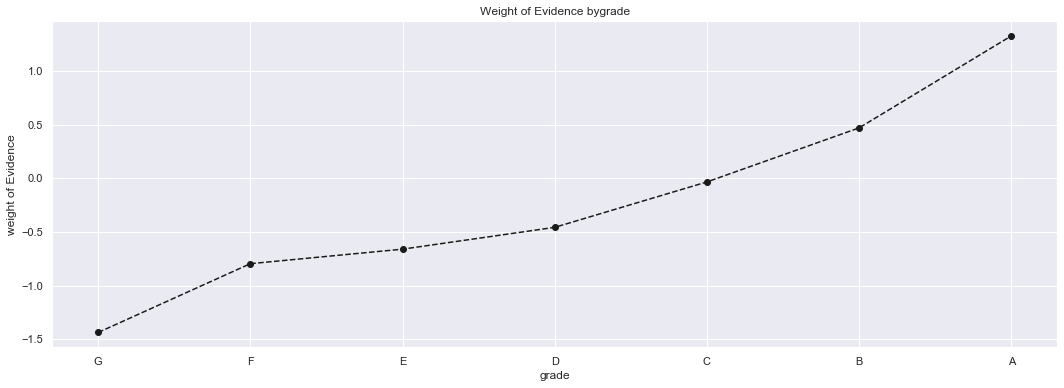

In [240]:
plot_by_woe(df_temp)

In [241]:
df_temp = woe_discrete(df_inputs_prepr,'home_ownership',df_targets_prepr)
df_temp

,home_ownership,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,NONE,10,0.900000,0.000107,9.0,1.0,0.000098,0.000581,-1.776602,NaN,NaN,0.011061
1,OTHER,45,0.933333,0.000483,42.0,3.0,0.000459,0.001743,-1.334769,0.033333,0.441833,0.011061
2,RENT,37874,0.979669,0.406125,37104.0,770.0,0.405349,0.447414,-0.098737,0.046336,1.236032,0.011061
3,OWN,8409,0.981211,0.090170,8251.0,158.0,0.090139,0.091807,-0.018332,0.001541,0.080405,0.011061
4,MORTGAGE,46919,0.983184,0.503115,46130.0,789.0,0.503955,0.458454,0.094626,0.001973,0.112958,0.011061


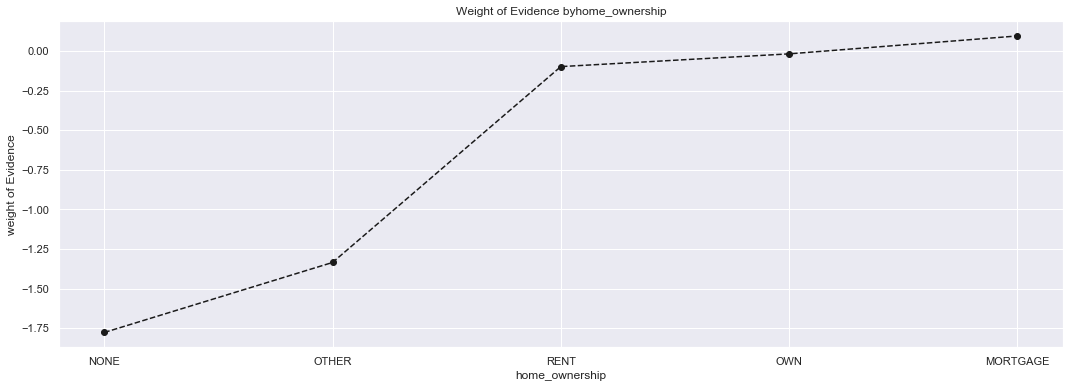

In [242]:
plot_by_woe(df_temp)

In [243]:
df_inputs_prepr['home_ownership:RENT_OTHER_NONE_ANY'] = sum([df_inputs_prepr['home_ownership:RENT'],df_inputs_prepr['home_ownership:OTHER'],
                                                            df_inputs_prepr['home_ownership:NONE'],df_inputs_prepr['home_ownership:ANY']])

In [244]:
df_temp=woe_discrete(df_inputs_prepr,'addr_state',df_targets_prepr)
df_temp

D:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':
D:\Program Files\Anaconda3\lib\site-packages\pandas\core\algorithms.py:1819: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,addr_state,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,NE,1,0.000000,0.000011,0.0,1.0,0.000000,0.000581,-inf,NaN,NaN,inf
1,HI,486,0.971193,0.005211,472.0,14.0,0.005156,0.008135,-0.455905,0.971193,inf,inf
2,SD,179,0.972067,0.001919,174.0,5.0,0.001901,0.002905,-0.424209,0.000874,0.031696,inf
3,NV,1298,0.972265,0.013919,1262.0,36.0,0.013787,0.020918,-0.416893,0.000198,0.007317,inf
4,MT,293,0.972696,0.003142,285.0,8.0,0.003114,0.004648,-0.400779,0.000431,0.016114,inf
5,NM,513,0.974659,0.005501,500.0,13.0,0.005462,0.007554,-0.324168,0.001963,0.076611,inf
6,VA,2856,0.976541,0.030625,2789.0,67.0,0.030469,0.038931,-0.245081,0.001882,0.079087,inf
7,OK,833,0.977191,0.008932,814.0,19.0,0.008893,0.011040,-0.216305,0.000650,0.028776,inf
8,NC,2478,0.978612,0.026572,2425.0,53.0,0.026492,0.030796,-0.150532,0.001421,0.065774,inf
9,GA,3015,0.979104,0.032330,2952.0,63.0,0.032250,0.036607,-0.126723,0.000493,0.023809,inf


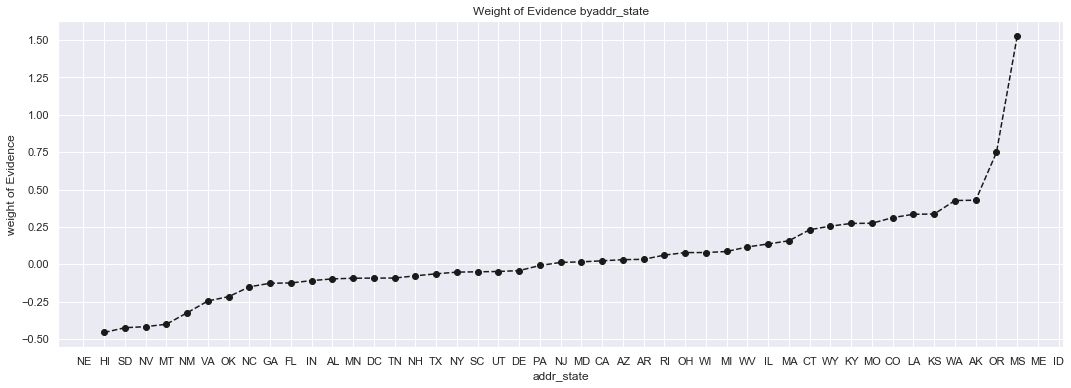

In [245]:
plot_by_woe(df_temp)

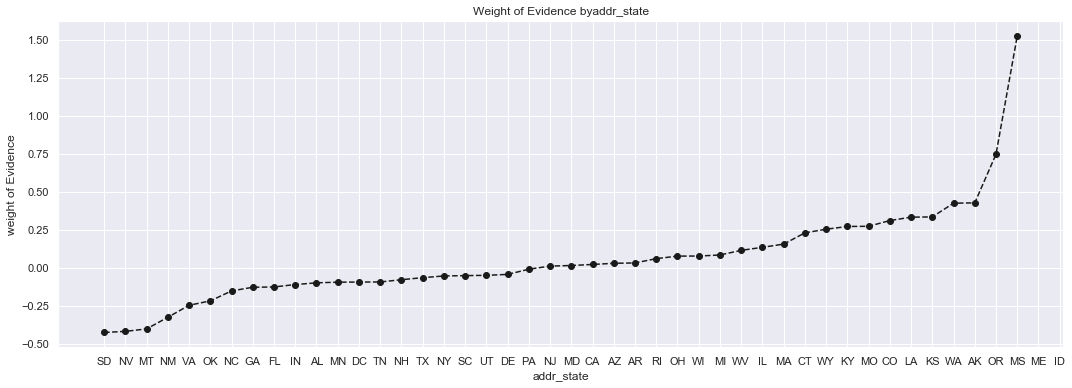

In [246]:
plot_by_woe(df_temp.iloc[2:-2,:])

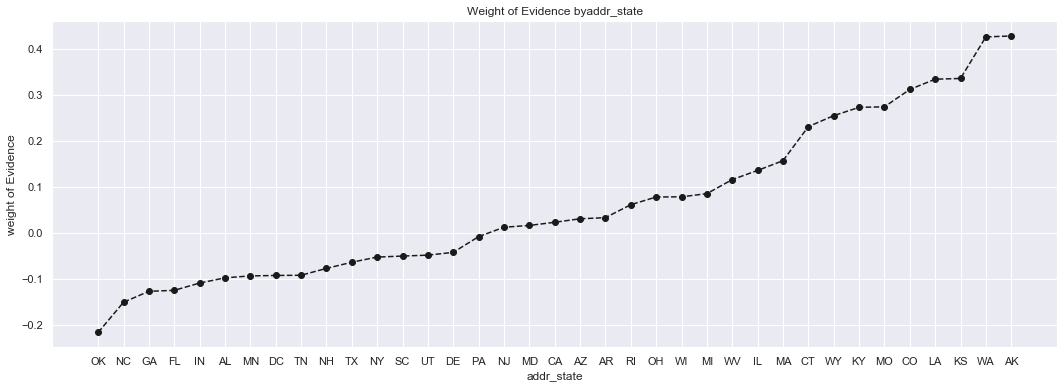

In [247]:
plot_by_woe(df_temp.iloc[7:-6,:])

In [248]:
df_inputs_prepr['addr_state:NE_IA_MS_MT_TN_RI_NV'] =sum([df_inputs_prepr['addr_state:NE'],df_inputs_prepr['addr_state:IA'],
                                                       df_inputs_prepr['addr_state:MS'],df_inputs_prepr['addr_state:MT'],
                                                       df_inputs_prepr['addr_state:TN'],df_inputs_prepr['addr_state:RI'],
                                                       df_inputs_prepr['addr_state:NV']])


In [249]:
df_inputs_prepr['addr_state:ME_ID_WY_DC_KS_NH'] =sum([df_inputs_prepr['addr_state:ME'],df_inputs_prepr['addr_state:ID'],
                                                       df_inputs_prepr['addr_state:WY'],df_inputs_prepr['addr_state:DC'],
                                                       df_inputs_prepr['addr_state:KS'],df_inputs_prepr['addr_state:NH']]) 

In [250]:
df_inputs_prepr['addr_state:MD_FL_VA_MA'] =sum([df_inputs_prepr['addr_state:MD'],df_inputs_prepr['addr_state:FL'],
                                                       df_inputs_prepr['addr_state:VA'],df_inputs_prepr['addr_state:MA']]) 

In [251]:
df_inputs_prepr['addr_state:AR_DE_WV_MO'] =sum([df_inputs_prepr['addr_state:AR'],df_inputs_prepr['addr_state:DE'],
                                                       df_inputs_prepr['addr_state:WV'],df_inputs_prepr['addr_state:MO']]) 

In [252]:
df_inputs_prepr['addr_state:IN_OH_NC_AL_MI'] =sum([df_inputs_prepr['addr_state:IN'],df_inputs_prepr['addr_state:OH'],
                                                       df_inputs_prepr['addr_state:NC'],df_inputs_prepr['addr_state:AL'],
                                                  df_inputs_prepr['addr_state:MI']]) 

In [253]:
df_inputs_prepr['addr_state:NJ_GA'] =sum([df_inputs_prepr['addr_state:NJ'],df_inputs_prepr['addr_state:GA']]) 

In [254]:
df_inputs_prepr['addr_state:AK_WI'] =sum([df_inputs_prepr['addr_state:AK'],df_inputs_prepr['addr_state:WI']]) 

In [255]:
df_inputs_prepr['addr_state:VT_CO_IL'] =sum([df_inputs_prepr['addr_state:VT'],df_inputs_prepr['addr_state:CO'],df_inputs_prepr['addr_state:IL']]) 

In [256]:
df_inputs_prepr['addr_state:UT_MN_SC_OR_KY_NM'] =sum([df_inputs_prepr['addr_state:UT'],df_inputs_prepr['addr_state:MN'],
                                                       df_inputs_prepr['addr_state:SC'],df_inputs_prepr['addr_state:OR'],
                                                       df_inputs_prepr['addr_state:KY'],df_inputs_prepr['addr_state:NM']])


In [257]:
df_inputs_prepr['addr_state:WA_CT'] =sum([df_inputs_prepr['addr_state:WA'],df_inputs_prepr['addr_state:CT']]) 

In [258]:
df_inputs_prepr['term:36'] = np.where(df_inputs_prepr['term_int']==36,1,0)
df_inputs_prepr['term:60'] = np.where(df_inputs_prepr['term_int']==60,1,0)

In [259]:
df_temp = woe_discrete(df_inputs_prepr,'verification_status',df_targets_prepr)
df_temp

,verification_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,Source Verified,29963,0.979141,0.321295,29338.0,625.0,0.320508,0.363161,-0.124940,NaN,NaN,0.022354
1,Verified,33641,0.980351,0.360734,32980.0,661.0,0.360295,0.384079,-0.063924,0.001210,0.061016,0.022354
2,Not Verified,29653,0.985330,0.317971,29218.0,435.0,0.319197,0.252760,0.233367,0.004979,0.297291,0.022354


In [260]:
df_temp = woe_discrete(df_inputs_prepr,'purpose',df_targets_prepr)
df_temp

,purpose,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,educational,89,0.910112,0.000954,81.0,8.0,0.000885,0.004648,-1.658819,NaN,NaN,inf
1,small_business,1431,0.971349,0.015345,1390.0,41.0,0.015185,0.023823,-0.450340,0.061236,1.208479,inf
2,other,4806,0.977736,0.051535,4699.0,107.0,0.051335,0.062173,-0.191551,0.006387,0.258789,inf
3,debt_consolidation,55012,0.980495,0.589897,53939.0,1073.0,0.589265,0.623475,-0.056432,0.002759,0.135119,inf
4,medical,918,0.981481,0.009844,901.0,17.0,0.009843,0.009878,-0.003535,0.000986,0.052897,inf
5,home_improvement,5299,0.981695,0.056821,5202.0,97.0,0.056830,0.056363,0.008261,0.000213,0.011796,inf
6,house,439,0.984055,0.004707,432.0,7.0,0.004719,0.004067,0.148689,0.002360,0.140428,inf
7,wedding,456,0.984649,0.004890,449.0,7.0,0.004905,0.004067,0.187286,0.000594,0.038597,inf
8,major_purchase,1991,0.984932,0.021350,1961.0,30.0,0.021423,0.017432,0.206186,0.000283,0.018900,inf
9,moving,602,0.985050,0.006455,593.0,9.0,0.006478,0.005230,0.214143,0.000118,0.007957,inf


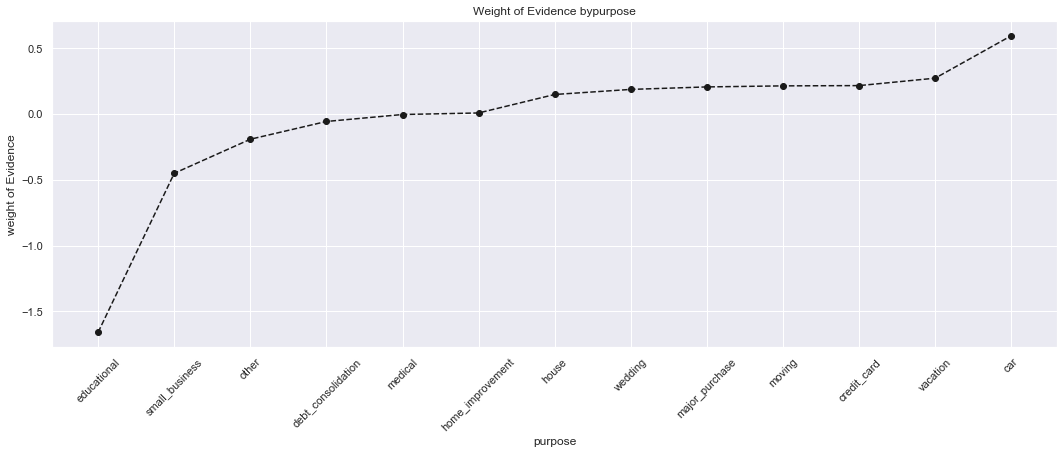

In [261]:
plot_by_woe(df_temp,45)

In [262]:
df_inputs_prepr['purpose:educ__sm_b__house__mov'] = sum([df_inputs_prepr['purpose:educational'],df_inputs_prepr['purpose:small_business'],
                                                        df_inputs_prepr['purpose:house'],df_inputs_prepr['purpose:moving']])

In [263]:
df_inputs_prepr['purpose:oth__med'] = sum([df_inputs_prepr['purpose:other'], df_inputs_prepr['purpose:medical']])

In [264]:
df_inputs_prepr['purpose:home_impr__vacation'] = sum([df_inputs_prepr['purpose:home_improvement'], df_inputs_prepr['purpose:vacation']])

In [265]:
df_inputs_prepr['purpose:home_impr__vacation'] = sum([df_inputs_prepr['purpose:home_improvement'], df_inputs_prepr['purpose:vacation']])

In [266]:
df_inputs_prepr['purpose:major_purch__ren_en__car__wedd'] = sum([df_inputs_prepr['purpose:major_purchase'], df_inputs_prepr['purpose:renewable_energy'],df_inputs_prepr['purpose:car'],df_inputs_prepr['purpose:wedding']])

In [269]:
df_inputs_prepr['initial_list_status'].unique()

array(['f', 'w'], dtype=object)

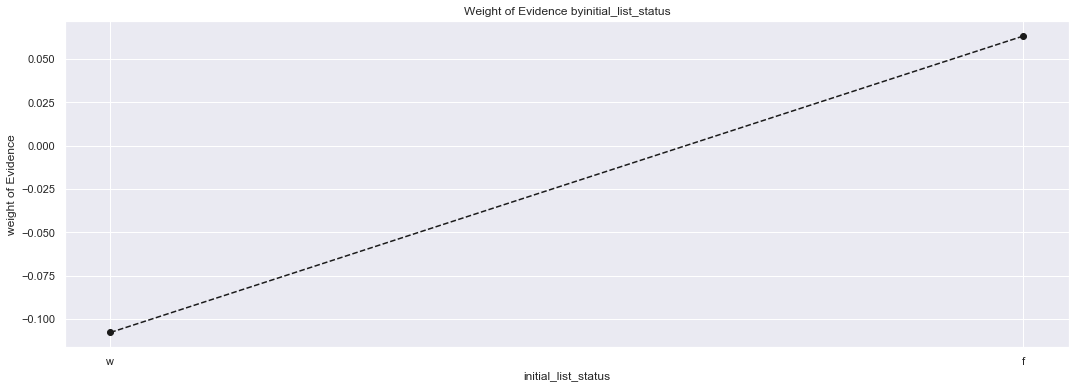

In [270]:
df_temp=woe_discrete(df_inputs_prepr,'initial_list_status',df_targets_prepr)
plot_by_woe(df_temp)

## Preprocessing continous variables

In [271]:
def woe_ordered_continuous(df,discrete_variable_name,good_bad_variable_df) :
    df =pd.concat([df[discrete_variable_name],good_bad_variable_df],axis=1)
    df =pd.concat([df.groupby(df.columns.values[0],as_index = False)[df.columns.values[1]].count(),
                  df.groupby(df.columns.values[0],as_index = False)[df.columns.values[1]].mean()],axis=1) #proportion of good is mean 
    df = df.iloc[:,[0,1,3]]
    df.columns = [df.columns.values[0],'n_obs','prop_good']
    df['prop_n_obs'] = df['n_obs']/df['n_obs'].sum()
    df['n_good'] = df['prop_good']* df['n_obs']
    df['n_bad']  = (1- df['prop_good'])* df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good']/df['prop_n_bad'])
    #df = df.sort_values(['WoE'])
    #df = df.reset_index(drop= True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad'])* df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [272]:
df_temp= woe_ordered_continuous(df_inputs_prepr,'emp_length_int',df_targets_prepr)
df_temp

,emp_length_int,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0,11553,0.977668,0.123883,11295.0,258.0,0.123394,0.149913,-0.194671,NaN,NaN,0.012294
1,1,5968,0.980060,0.063995,5849.0,119.0,0.063898,0.069146,-0.078924,0.002392,0.115747,0.012294
2,2,8295,0.981917,0.088948,8145.0,150.0,0.088981,0.087159,0.020697,0.001856,0.099622,0.012294
3,3,7391,0.981735,0.079254,7256.0,135.0,0.079269,0.078443,0.010482,0.000182,0.010215,0.012294
4,4,5555,0.979478,0.059567,5441.0,114.0,0.059441,0.066241,-0.108307,0.002257,0.118790,0.012294
5,5,6172,0.983960,0.066183,6073.0,99.0,0.066345,0.057525,0.142661,0.004482,0.250968,0.012294
6,6,5225,0.980670,0.056028,5124.0,101.0,0.055978,0.058687,-0.047257,0.003290,0.189918,0.012294
7,7,5131,0.983824,0.055020,5048.0,83.0,0.055148,0.048228,0.134080,0.003154,0.181337,0.012294
8,8,4542,0.979745,0.048704,4450.0,92.0,0.048615,0.053457,-0.094956,0.004079,0.229036,0.012294
9,9,3621,0.985363,0.038828,3568.0,53.0,0.038979,0.030796,0.235642,0.005619,0.330598,0.012294


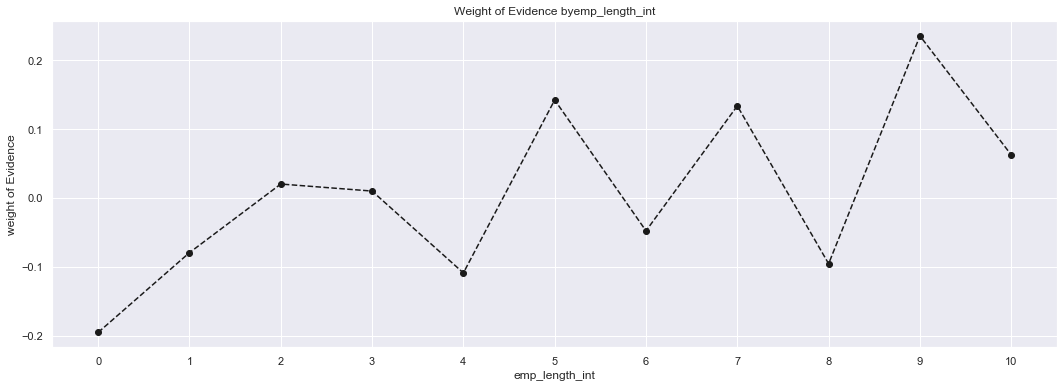

In [273]:
plot_by_woe(df_temp)

In [274]:
df_inputs_prepr['emp_length:0'] = np.where(df_inputs_prepr['emp_length_int'].isin([0]),1,0)
df_inputs_prepr['emp_length:1'] = np.where(df_inputs_prepr['emp_length_int'].isin([1]),1,0)
df_inputs_prepr['emp_length:2'] = np.where(df_inputs_prepr['emp_length_int'].isin([2]),1,0)
df_inputs_prepr['emp_length:3'] = np.where(df_inputs_prepr['emp_length_int'].isin([3]),1,0)
df_inputs_prepr['emp_length:4-5'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(4,6)),1,0)
df_inputs_prepr['emp_length:6'] = np.where(df_inputs_prepr['emp_length_int'].isin([6]),1,0)
df_inputs_prepr['emp_length:7'] = np.where(df_inputs_prepr['emp_length_int'].isin([7]),1,0)
df_inputs_prepr['emp_length:8'] = np.where(df_inputs_prepr['emp_length_int'].isin([8]),1,0)
df_inputs_prepr['emp_length:9'] = np.where(df_inputs_prepr['emp_length_int'].isin([9]),1,0)
df_inputs_prepr['emp_length:10'] = np.where(df_inputs_prepr['emp_length_int'].isin([10]),1,0)

In [275]:
df_inputs_prepr['mths_issue_date_factor'] = pd.cut(df_inputs_prepr['mths_issue_date'],50)

In [276]:
df_temp = woe_ordered_continuous(df_inputs_prepr,'mths_issue_date_factor',df_targets_prepr)
df_temp

,mths_issue_date_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(35.91, 37.8]",7191,0.979419,0.077109,7043.0,148.0,0.076942,0.085997,-0.111250,NaN,NaN,inf
1,"(37.8, 39.6]",9752,0.975800,0.104571,9516.0,236.0,0.103959,0.137130,-0.276929,0.003619,0.165679,inf
2,"(39.6, 41.4]",9506,0.977067,0.101933,9288.0,218.0,0.101468,0.126671,-0.221843,0.001267,0.055085,inf
3,"(41.4, 43.2]",7240,0.975414,0.077635,7062.0,178.0,0.077150,0.103428,-0.293127,0.001653,0.071283,inf
4,"(43.2, 45.0]",7217,0.978523,0.077388,7062.0,155.0,0.077150,0.090064,-0.154768,0.003109,0.138358,inf
5,"(45.0, 46.8]",3104,0.979059,0.033284,3039.0,65.0,0.033200,0.037769,-0.128930,0.000536,0.025838,inf
6,"(46.8, 48.6]",6197,0.976763,0.066451,6053.0,144.0,0.066127,0.083672,-0.235331,0.002296,0.106401,inf
7,"(48.6, 50.4]",5821,0.978698,0.062419,5697.0,124.0,0.062238,0.072051,-0.146413,0.001935,0.088917,inf
8,"(50.4, 52.2]",5021,0.985262,0.053840,4947.0,74.0,0.054044,0.042998,0.228645,0.006564,0.375058,inf
9,"(52.2, 54.0]",4497,0.988214,0.048222,4444.0,53.0,0.048549,0.030796,0.455191,0.002952,0.226547,inf


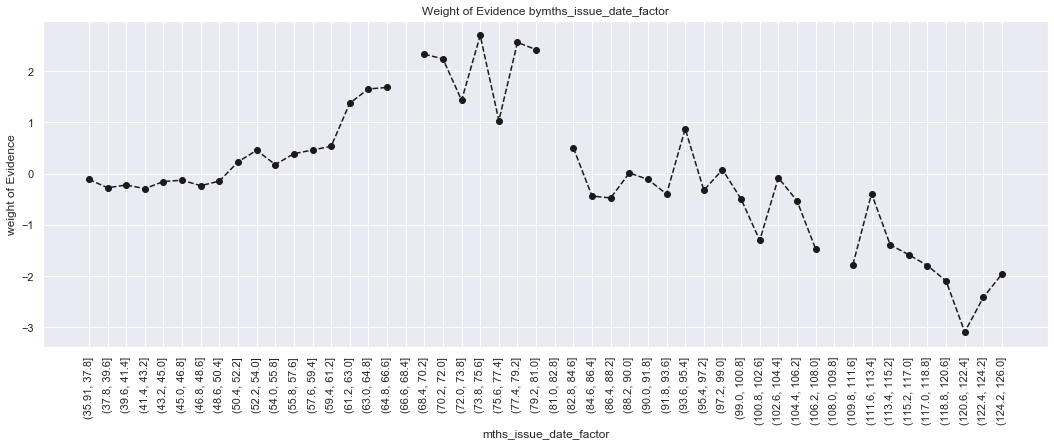

In [277]:
plot_by_woe(df_temp,90)

In [278]:
df_inputs_prepr['mths_issue_date:<47'] = np.where(df_inputs_prepr['mths_issue_date'].isin(range(47)),1,0)
df_inputs_prepr['mths_issue_date:47-50'] = np.where(df_inputs_prepr['mths_issue_date'].isin(range(47,51)),1,0)
df_inputs_prepr['mths_issue_date:51-57'] = np.where(df_inputs_prepr['mths_issue_date'].isin(range(51,58)),1,0)
df_inputs_prepr['mths_issue_date:58-61'] = np.where(df_inputs_prepr['mths_issue_date'].isin(range(58,62)),1,0)
df_inputs_prepr['mths_issue_date:62-85'] = np.where(df_inputs_prepr['mths_issue_date'].isin(range(62,86)),1,0) 
df_inputs_prepr['mths_issue_date:>86'] = np.where(df_inputs_prepr['mths_issue_date'].isin(range(86,int(df_inputs_prepr['mths_issue_date'].max()))),1,0)                                                    
                                                    

In [279]:
df_inputs_prepr['int_rate_factor'] = pd.cut(df_inputs_prepr['int_rate'],50)

In [280]:
df_temp = woe_ordered_continuous(df_inputs_prepr,'int_rate_factor',df_targets_prepr)
df_temp

,int_rate_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(5.399, 5.833]",198,1.000000,0.002123,198.0,0.0,0.002163,0.000000,inf,NaN,NaN,inf
1,"(5.833, 6.246]",2086,0.999041,0.022368,2084.0,2.0,0.022767,0.001162,2.975070,0.000959,inf,inf
2,"(6.246, 6.658]",1974,0.995441,0.021167,1965.0,9.0,0.021467,0.005230,1.412196,0.003600,1.562874,inf
3,"(6.658, 7.071]",477,0.997904,0.005115,476.0,1.0,0.005200,0.000581,2.191591,0.002463,0.779395,inf
4,"(7.071, 7.484]",804,0.995025,0.008621,800.0,4.0,0.008740,0.002324,1.324491,0.002879,0.867100,inf
5,"(7.484, 7.897]",3245,0.995686,0.034796,3231.0,14.0,0.035298,0.008135,1.467663,0.000661,0.143172,inf
6,"(7.897, 8.31]",2429,0.994236,0.026046,2415.0,14.0,0.026383,0.008135,1.176570,0.001449,0.291092,inf
7,"(8.31, 8.722]",1680,0.990476,0.018015,1664.0,16.0,0.018179,0.009297,0.670564,0.003760,0.506006,inf
8,"(8.722, 9.135]",2384,0.992869,0.025564,2367.0,17.0,0.025859,0.009878,0.962338,0.002393,0.291774,inf
9,"(9.135, 9.548]",1590,0.991824,0.017050,1577.0,13.0,0.017228,0.007554,0.824503,0.001045,0.137835,inf


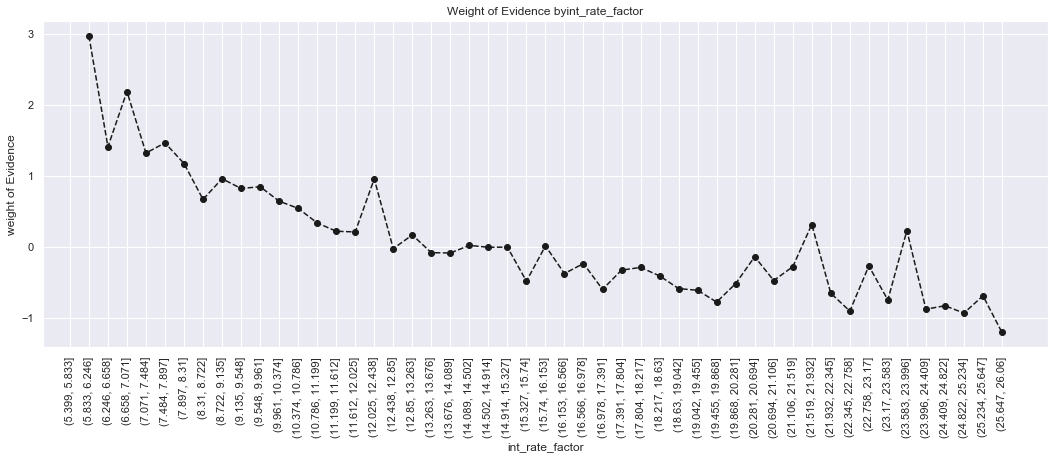

In [281]:
plot_by_woe(df_temp,90)

In [282]:
df_inputs_prepr['int_rate:<9.548'] = np.where((df_inputs_prepr['int_rate']<=9.548),1,0)
df_inputs_prepr['int_rate:9.548-12.025'] = np.where(((df_inputs_prepr['int_rate']>9.548)&(df_inputs_prepr['int_rate']<=12.025)),1,0)
df_inputs_prepr['int_rate:12.025-15.74'] = np.where(((df_inputs_prepr['int_rate']>12.025)&(df_inputs_prepr['int_rate']<=15.74)),1,0)
df_inputs_prepr['int_rate:15.74-18.217'] = np.where(((df_inputs_prepr['int_rate']>15.74)&(df_inputs_prepr['int_rate']<=18.217)),1,0)
df_inputs_prepr['int_rate:>18.217'] = np.where((df_inputs_prepr['int_rate']>18.217),1,0)

In [283]:
df_inputs_prepr['funded_amnt_factor']=pd.cut(df_inputs_prepr['funded_amnt'],50)
df_temp=woe_ordered_continuous(df_inputs_prepr,'funded_amnt_factor',df_targets_prepr)

In [329]:
df_inputs_prepr['funded_amnt_factor']

362514    (32240.0, 32930.0]
288564    (10850.0, 11540.0]
213591    (29480.0, 30170.0]
263083    (14300.0, 14990.0]
165001    (14990.0, 15680.0]
82511      (9470.0, 10160.0]
24671     (11540.0, 12230.0]
97373     (10850.0, 11540.0]
44058     (23960.0, 24650.0]
351326      (5330.0, 6020.0]
176798    (29480.0, 30170.0]
2253      (24650.0, 25340.0]
11493     (11540.0, 12230.0]
247866      (5330.0, 6020.0]
465694    (10160.0, 10850.0]
440413    (23960.0, 24650.0]
340144    (20510.0, 21200.0]
145732     (9470.0, 10160.0]
171649    (19820.0, 20510.0]
135808     (9470.0, 10160.0]
42139      (9470.0, 10160.0]
196634      (7400.0, 8090.0]
41142       (2570.0, 3260.0]
310417      (4640.0, 5330.0]
274665      (2570.0, 3260.0]
269466    (11540.0, 12230.0]
1554      (11540.0, 12230.0]
455384    (23960.0, 24650.0]
121647    (34310.0, 35000.0]
261521    (34310.0, 35000.0]
259632    (12920.0, 13610.0]
115179    (34310.0, 35000.0]
93531       (6020.0, 6710.0]
93946      (9470.0, 10160.0]
278174    (343

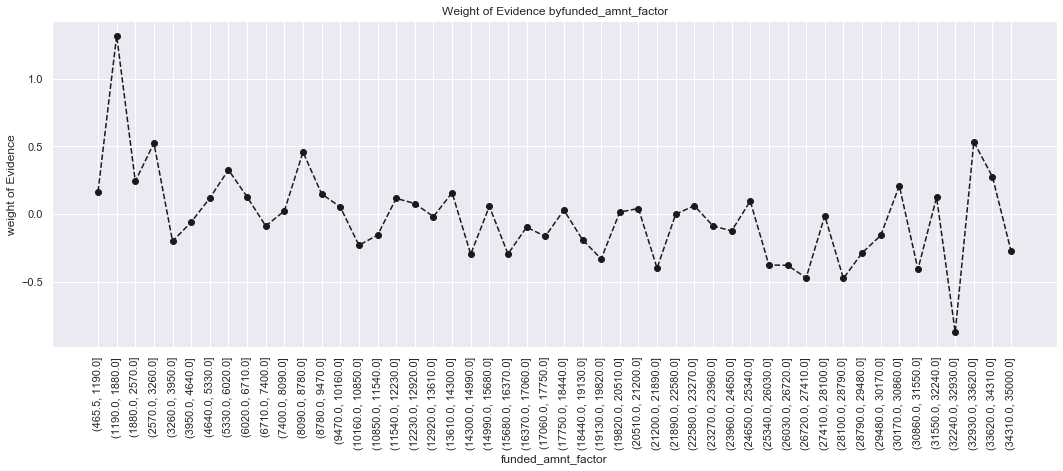

In [284]:
plot_by_woe(df_temp,90)

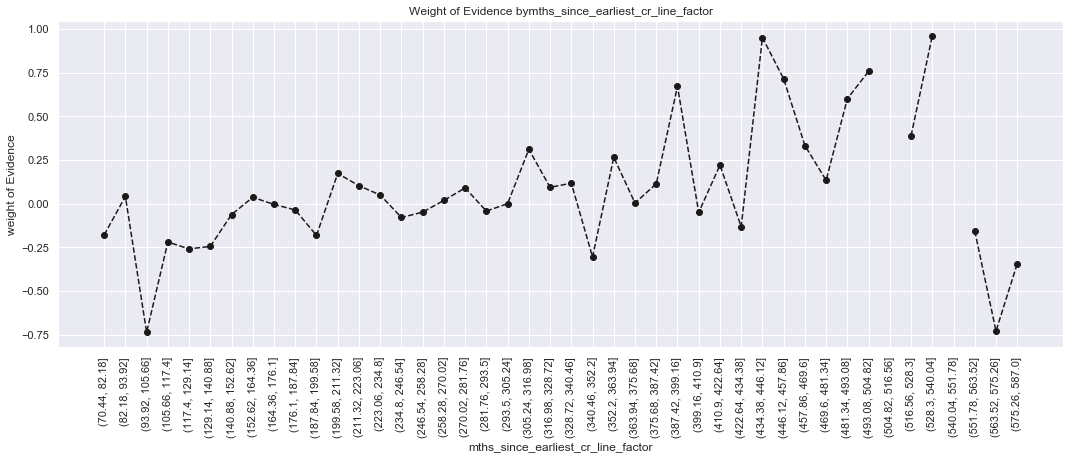

In [285]:
df_inputs_prepr['mths_since_earliest_cr_line_factor'] = pd.cut(df_inputs_prepr['mths_since_earliest_cr_line'],50)
df_temp=woe_ordered_continuous(df_inputs_prepr,'mths_since_earliest_cr_line_factor', df_targets_prepr)
plot_by_woe(df_temp.iloc[6:,:],90)

In [286]:
df_inputs_prepr['mths_since_earliest_cr_line:<140'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(140)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:141-164'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(140, 165)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:165-247'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(165, 248)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:248-270'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(248, 271)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:271-352'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(271, 353)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:>352'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(353, int(df_inputs_prepr['mths_since_earliest_cr_line'].max()))), 1, 0)

In [287]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'delinq_2yrs', df_targets_prepr)
df_temp


D:\Program Files\Anaconda3\lib\site-packages\pandas\core\algorithms.py:1819: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,delinq_2yrs,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,76566,0.982642,0.821021,75237.0,1329.0,0.821939,0.772225,0.062390,NaN,NaN,inf
1,1.0,11297,0.977605,0.121138,11044.0,253.0,0.120652,0.147008,-0.197574,0.005038,0.259963,inf
2,2.0,3192,0.973371,0.034228,3107.0,85.0,0.033943,0.049390,-0.375065,0.004234,0.177491,inf
3,3.0,1134,0.974427,0.012160,1105.0,29.0,0.012072,0.016851,-0.333522,0.001056,0.041543,inf
4,4.0,510,0.976471,0.005469,498.0,12.0,0.005440,0.006973,-0.248133,0.002044,0.085389,inf
5,5.0,270,0.981481,0.002895,265.0,5.0,0.002895,0.002905,-0.003535,0.005011,0.244598,inf
6,6.0,128,0.968750,0.001373,124.0,4.0,0.001355,0.002324,-0.539840,0.012731,0.536305,inf
7,7.0,67,1.000000,0.000718,67.0,0.0,0.000732,0.000000,inf,0.031250,inf,inf
8,8.0,29,1.000000,0.000311,29.0,0.0,0.000317,0.000000,inf,0.000000,NaN,inf
9,9.0,22,0.954545,0.000236,21.0,1.0,0.000229,0.000581,-0.929304,0.045455,inf,inf


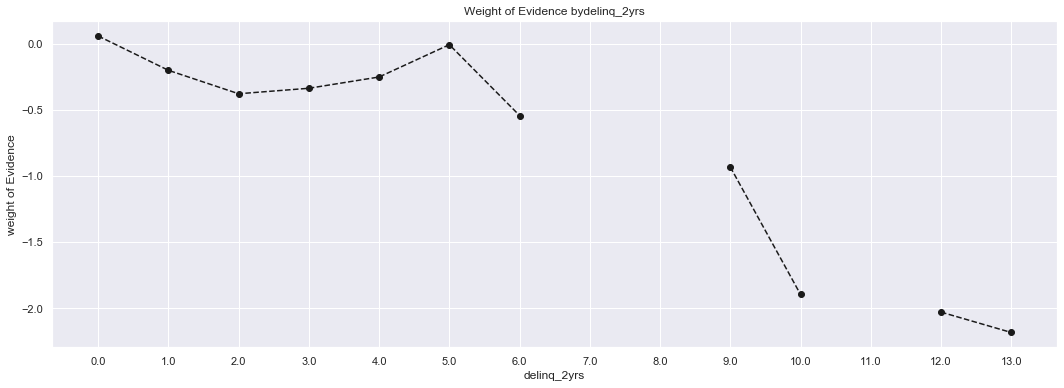

In [288]:
plot_by_woe(df_temp)

In [289]:
df_inputs_prepr['delinq_2yrs:0'] = np.where((df_inputs_prepr['delinq_2yrs'] == 0), 1, 0)
df_inputs_prepr['delinq_2yrs:1-3'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 1) & (df_inputs_prepr['delinq_2yrs'] <= 3), 1, 0)
df_inputs_prepr['delinq_2yrs:>=4'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 9), 1, 0)

In [290]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'inq_last_6mths', df_targets_prepr)
df_temp

D:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':


,inq_last_6mths,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,48295,0.984346,0.517870,47539.0,756.0,0.519348,0.439279,0.167438,NaN,NaN,inf
1,1.0,25985,0.980758,0.278639,25485.0,500.0,0.278415,0.290529,-0.042590,0.003588,0.210027,inf
2,2.0,11611,0.980966,0.124505,11390.0,221.0,0.124432,0.128414,-0.031498,0.000208,0.011091,inf
3,3.0,5086,0.983681,0.054537,5003.0,83.0,0.054656,0.048228,0.125126,0.002714,0.156624,inf
4,4.0,1431,0.950384,0.015345,1360.0,71.0,0.014858,0.041255,-1.021267,0.033296,1.146392,inf
5,5.0,551,0.931034,0.005908,513.0,38.0,0.005604,0.022080,-1.371137,0.019350,0.349870,inf
6,6.0,211,0.895735,0.002263,189.0,22.0,0.002065,0.012783,-1.823122,0.035300,0.451985,inf
7,7.0,36,0.638889,0.000386,23.0,13.0,0.000251,0.007554,-3.403282,0.256846,1.580160,inf
8,8.0,21,0.571429,0.000225,12.0,9.0,0.000131,0.005230,-3.686145,0.067460,0.282863,inf
9,9.0,7,0.428571,0.000075,3.0,4.0,0.000033,0.002324,-4.261509,0.142857,0.575364,inf


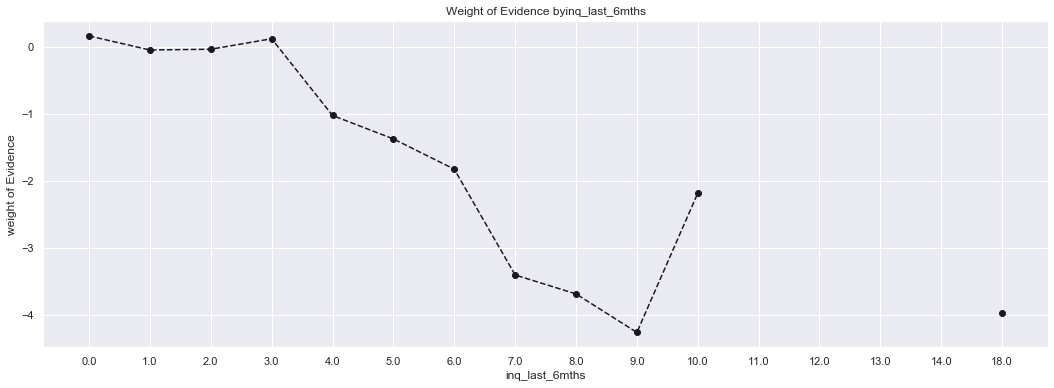

In [291]:
plot_by_woe(df_temp)

In [292]:
df_inputs_prepr['inq_last_6mths:0'] = np.where((df_inputs_prepr['inq_last_6mths'] == 0), 1, 0)
df_inputs_prepr['inq_last_6mths:1-3'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 1) & (df_inputs_prepr['inq_last_6mths'] <= 3), 1, 0)
df_inputs_prepr['inq_last_6mths:4-6'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 4) & (df_inputs_prepr['inq_last_6mths'] <= 6), 1, 0)
df_inputs_prepr['inq_last_6mths:>6'] = np.where((df_inputs_prepr['inq_last_6mths'] > 6), 1, 0)

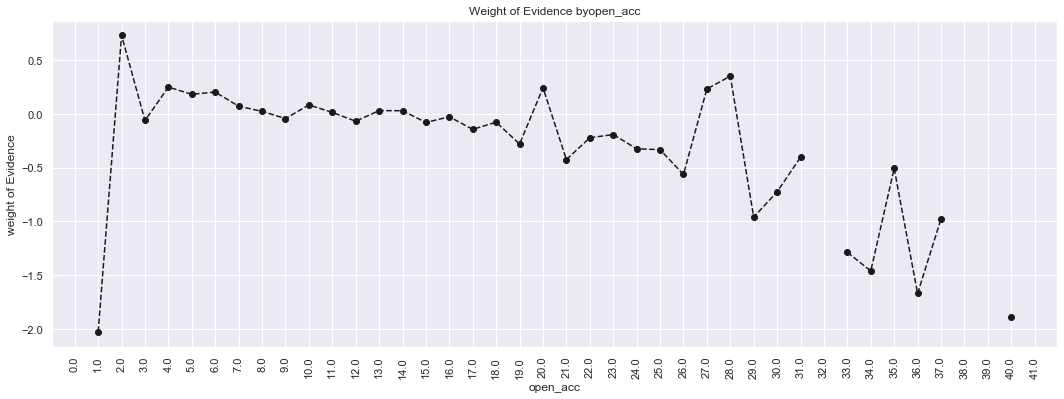

In [293]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'open_acc', df_targets_prepr)
df_temp
plot_by_woe(df_temp, 90)

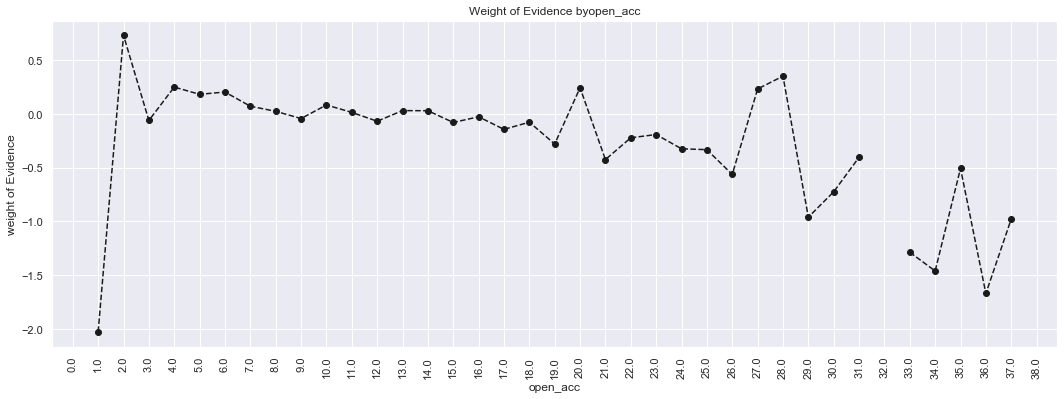

In [294]:
plot_by_woe(df_temp.iloc[ : 40, :], 90)

In [295]:
df_temp.iloc[ : 40, :]

,open_acc,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,7,1.000000,0.000075,7.0,0.0,0.000076,0.000000,inf,NaN,NaN,inf
1,1.0,32,0.875000,0.000343,28.0,4.0,0.000306,0.002324,-2.027917,0.125000,inf,inf
2,2.0,334,0.991018,0.003582,331.0,3.0,0.003616,0.001743,0.729679,0.116018,2.757596,inf
3,3.0,1122,0.980392,0.012031,1100.0,22.0,0.012017,0.012783,-0.061804,0.010626,0.791483,inf
4,4.0,2560,0.985547,0.027451,2523.0,37.0,0.027563,0.021499,0.248459,0.005155,0.310263,inf
5,5.0,4403,0.984556,0.047214,4335.0,68.0,0.047358,0.039512,0.181142,0.000991,0.067317,inf
6,6.0,6216,0.984878,0.066655,6122.0,94.0,0.066881,0.054619,0.202523,0.000322,0.021380,inf
7,7.0,7433,0.982779,0.079704,7305.0,128.0,0.079805,0.074375,0.070457,0.002098,0.132065,inf
8,8.0,8314,0.981958,0.089151,8164.0,150.0,0.089189,0.087159,0.023027,0.000821,0.047430,inf
9,9.0,8768,0.980725,0.094020,8599.0,169.0,0.093941,0.098199,-0.044324,0.001233,0.067352,inf


In [296]:
df_inputs_prepr['open_acc:0-4'] = np.where((df_inputs_prepr['open_acc'] >= 0) & (df_inputs_prepr['open_acc'] <= 4), 1, 0)
df_inputs_prepr['open_acc:5-7'] = np.where((df_inputs_prepr['open_acc'] >= 5) & (df_inputs_prepr['open_acc'] <= 7), 1, 0)
df_inputs_prepr['open_acc:8-10'] = np.where((df_inputs_prepr['open_acc'] >= 8) & (df_inputs_prepr['open_acc'] <= 10), 1, 0)
df_inputs_prepr['open_acc:11-13'] = np.where((df_inputs_prepr['open_acc'] >= 11) & (df_inputs_prepr['open_acc'] <= 13), 1, 0)
df_inputs_prepr['open_acc:14-18'] = np.where((df_inputs_prepr['open_acc'] >= 14) & (df_inputs_prepr['open_acc'] <= 18), 1, 0)
df_inputs_prepr['open_acc:>18'] = np.where((df_inputs_prepr['open_acc'] >= 18) , 1, 0)

In [297]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'pub_rec', df_targets_prepr)
df_temp

,pub_rec,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,80923,0.981884,0.867742,79457.0,1466.0,0.868041,0.851830,0.018852,NaN,NaN,inf
1,1.0,10670,0.979850,0.114415,10455.0,215.0,0.114217,0.124927,-0.089629,0.002034,0.108481,inf
2,2.0,1097,0.976299,0.011763,1071.0,26.0,0.011700,0.015107,-0.255575,0.003551,0.165946,inf
3,3.0,331,0.972810,0.003549,322.0,9.0,0.003518,0.005230,-0.396500,0.003489,0.140925,inf
4,4.0,112,0.991071,0.001201,111.0,1.0,0.001213,0.000581,0.735703,0.018262,1.132203,inf
5,5.0,73,0.986301,0.000783,72.0,1.0,0.000787,0.000581,0.302839,0.004770,0.432864,inf
6,6.0,19,0.894737,0.000204,17.0,2.0,0.000186,0.001162,-1.833761,0.091565,2.136600,inf
7,7.0,14,1.000000,0.000150,14.0,0.0,0.000153,0.000000,inf,0.105263,inf,inf
8,8.0,5,0.800000,0.000054,4.0,1.0,0.000044,0.000581,-2.587532,0.200000,inf,inf
9,9.0,2,1.000000,0.000021,2.0,0.0,0.000022,0.000000,inf,0.200000,inf,inf


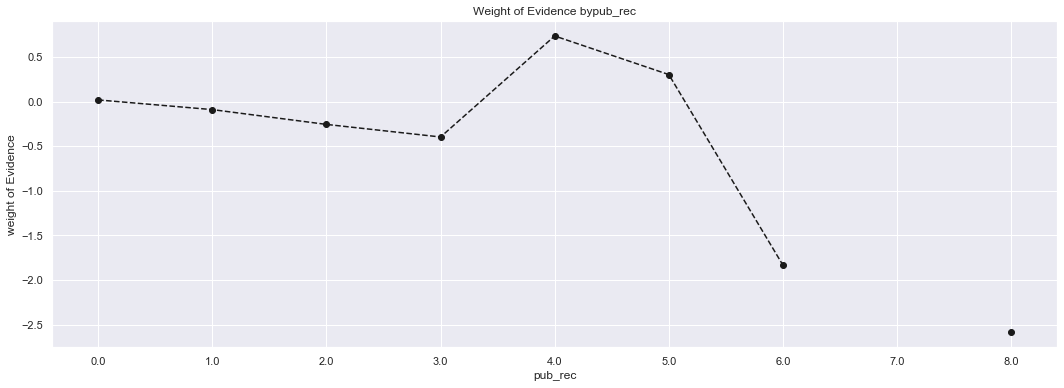

In [298]:
plot_by_woe(df_temp)

In [299]:
df_inputs_prepr['pub_rec:0'] = np.where((df_inputs_prepr['pub_rec'] == 0), 1, 0)
df_inputs_prepr['pub_rec:1-2'] = np.where((df_inputs_prepr['pub_rec'] >= 1) & (df_inputs_prepr['pub_rec'] <= 2), 1, 0)
df_inputs_prepr['pub_rec:>=3'] = np.where((df_inputs_prepr['pub_rec'] >= 3), 1, 0)

In [300]:
df_inputs_prepr['total_acc_factor'] = pd.cut(df_inputs_prepr['total_acc'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'total_acc_factor', df_targets_prepr)
df_temp

D:\Program Files\Anaconda3\lib\site-packages\pandas\core\algorithms.py:1819: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,total_acc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.156, 3.12]",125,0.952000,0.001340,119.0,6.0,0.001300,0.003486,-0.986463,NaN,NaN,inf
1,"(3.12, 6.24]",1499,0.973316,0.016074,1459.0,40.0,0.015939,0.023242,-0.377200,0.021316,0.609263,inf
2,"(6.24, 9.36]",3715,0.982503,0.039836,3650.0,65.0,0.039875,0.037769,0.054268,0.009188,0.431468,inf
3,"(9.36, 12.48]",6288,0.979167,0.067427,6157.0,131.0,0.067263,0.076119,-0.123679,0.003337,0.177948,inf
4,"(12.48, 15.6]",8289,0.981180,0.088883,8133.0,156.0,0.088850,0.090645,-0.019998,0.002013,0.103682,inf
5,"(15.6, 18.72]",9843,0.983237,0.105547,9678.0,165.0,0.105729,0.095874,0.097838,0.002057,0.117836,inf
6,"(18.72, 21.84]",10270,0.983642,0.110126,10102.0,168.0,0.110361,0.097618,0.122698,0.000405,0.024860,inf
7,"(21.84, 24.96]",9971,0.981948,0.106920,9791.0,180.0,0.106963,0.104590,0.022435,0.001694,0.100263,inf
8,"(24.96, 28.08]",11873,0.981049,0.127315,11648.0,225.0,0.127250,0.130738,-0.027037,0.000898,0.049473,inf
9,"(28.08, 31.2]",7289,0.982714,0.078160,7163.0,126.0,0.078253,0.073213,0.066575,0.001664,0.093613,inf


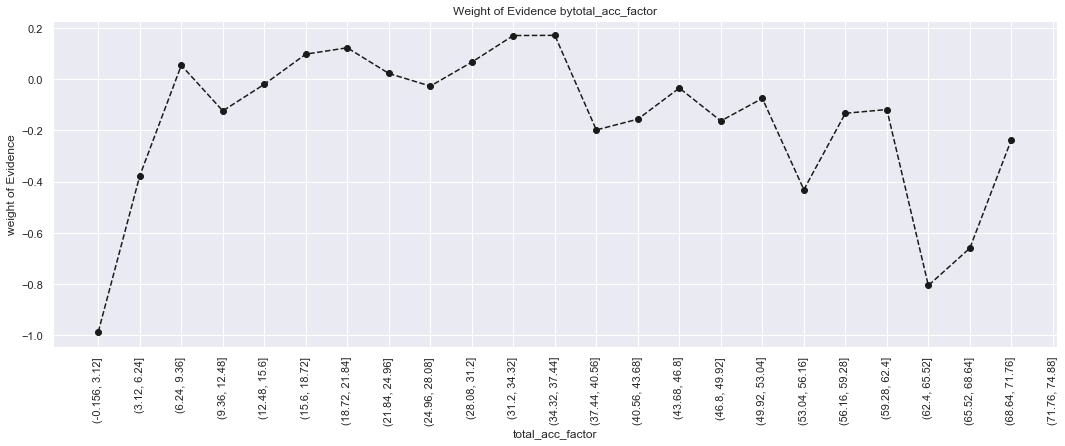

In [301]:
plot_by_woe(df_temp,90)

In [302]:
df_inputs_prepr['total_acc:<=27'] = np.where((df_inputs_prepr['total_acc'] <= 27), 1, 0)
df_inputs_prepr['total_acc:28-51'] = np.where((df_inputs_prepr['total_acc'] >= 28) & (df_inputs_prepr['total_acc'] <= 51), 1, 0)
df_inputs_prepr['total_acc:>=52'] = np.where((df_inputs_prepr['total_acc'] >= 52), 1, 0)

In [303]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'acc_now_delinq', df_targets_prepr)
df_temp

,acc_now_delinq,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,92871,0.981663,0.995861,91168.0,1703.0,0.995980,0.989541,0.006486,NaN,NaN,inf
1,1.0,360,0.955556,0.003860,344.0,16.0,0.003758,0.009297,-0.905774,0.026107,0.912260,inf
2,2.0,22,0.909091,0.000236,20.0,2.0,0.000218,0.001162,-1.671242,0.046465,0.765468,inf
3,3.0,4,1.000000,0.000043,4.0,0.0,0.000044,0.000000,inf,0.090909,inf,inf


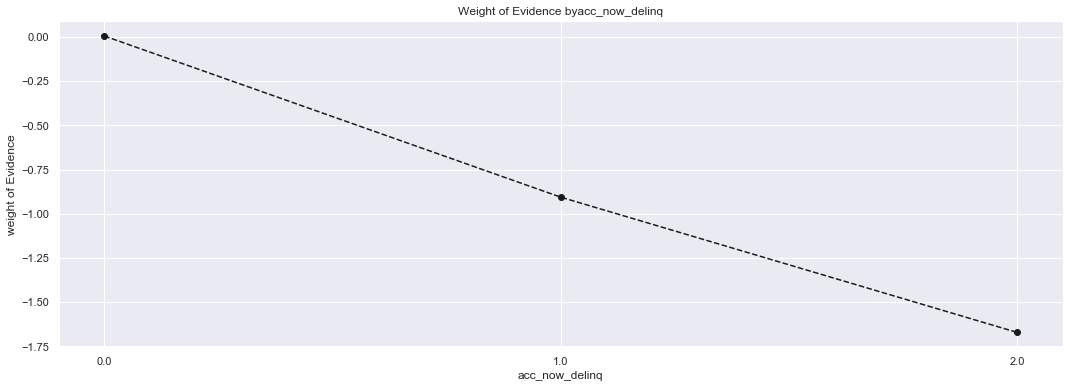

In [304]:
plot_by_woe(df_temp)

In [305]:
df_inputs_prepr['acc_now_delinq:0'] = np.where((df_inputs_prepr['acc_now_delinq'] == 0), 1, 0)
df_inputs_prepr['acc_now_delinq:>=1'] = np.where((df_inputs_prepr['acc_now_delinq'] >= 1), 1, 0)

In [306]:
df_inputs_prepr['total_rev_hi_lim_factor'] = pd.cut(df_inputs_prepr['total_rev_hi_lim'], 2000)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'total_rev_hi_lim_factor', df_targets_prepr)
df_temp

D:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':
D:\Program Files\Anaconda3\lib\site-packages\pandas\core\algorithms.py:1819: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,total_rev_hi_lim_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-2013.133, 1006.566]",238,0.983193,0.002552,234.0,4.0,0.002556,0.002324,0.095200,NaN,NaN,inf
1,"(1006.566, 2013.133]",678,0.985251,0.007270,668.0,10.0,0.007298,0.005811,0.227876,0.002057,0.132676,inf
2,"(2013.133, 3019.7]",1121,0.986619,0.012021,1106.0,15.0,0.012083,0.008716,0.326628,0.001368,0.098752,inf
3,"(3019.7, 4026.266]",1461,0.981520,0.015666,1434.0,27.0,0.015666,0.015689,-0.001441,0.005100,0.328069,inf
4,"(4026.266, 5032.832]",2163,0.970411,0.023194,2099.0,64.0,0.022931,0.037188,-0.483494,0.011108,0.482053,inf
5,"(5032.832, 6039.399]",2411,0.977603,0.025853,2357.0,54.0,0.025749,0.031377,-0.197666,0.007191,0.285828,inf
6,"(6039.399, 7045.966]",2376,0.981061,0.025478,2331.0,45.0,0.025465,0.026148,-0.026437,0.003458,0.171229,inf
7,"(7045.966, 8052.532]",2825,0.982301,0.030293,2775.0,50.0,0.030316,0.029053,0.042556,0.001240,0.068993,inf
8,"(8052.532, 9059.098]",2686,0.975800,0.028802,2621.0,65.0,0.028634,0.037769,-0.276903,0.006500,0.319459,inf
9,"(9059.098, 10065.665]",3514,0.980080,0.037681,3444.0,70.0,0.037625,0.040674,-0.077933,0.004279,0.198970,inf


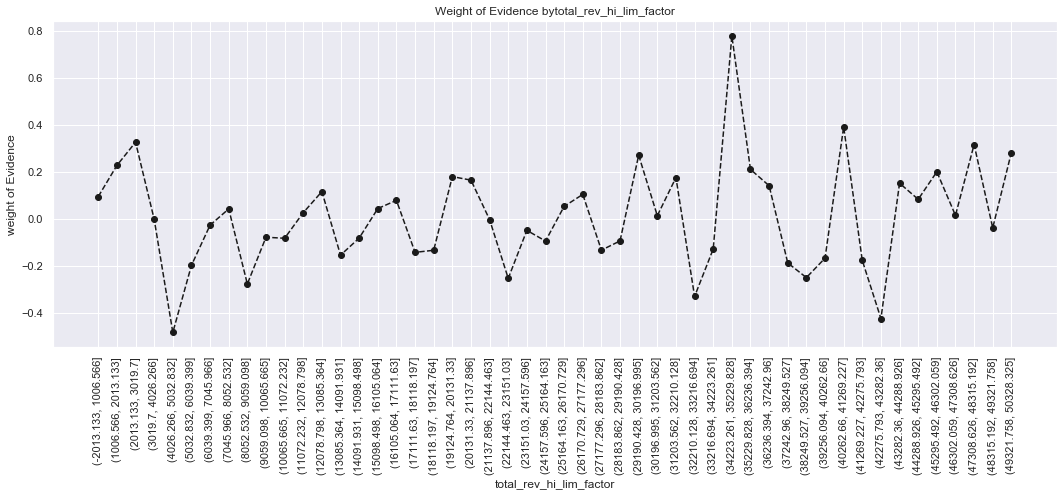

In [307]:
plot_by_woe(df_temp.iloc[: 50, : ], 90)

In [308]:
df_inputs_prepr['total_rev_hi_lim:<=5K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] <= 5000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:5K-10K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 5000) & (df_inputs_prepr['total_rev_hi_lim'] <= 10000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:10K-20K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 10000) & (df_inputs_prepr['total_rev_hi_lim'] <= 20000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:20K-30K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 20000) & (df_inputs_prepr['total_rev_hi_lim'] <= 30000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:30K-40K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 30000) & (df_inputs_prepr['total_rev_hi_lim'] <= 40000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:40K-55K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 40000) & (df_inputs_prepr['total_rev_hi_lim'] <= 55000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:55K-95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 55000) & (df_inputs_prepr['total_rev_hi_lim'] <= 95000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:>95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 95000), 1, 0)

In [309]:
df_inputs_prepr['installment_factor'] = pd.cut(df_inputs_prepr['installment'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'installment_factor', df_targets_prepr)

D:\Program Files\Anaconda3\lib\site-packages\pandas\core\algorithms.py:1819: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


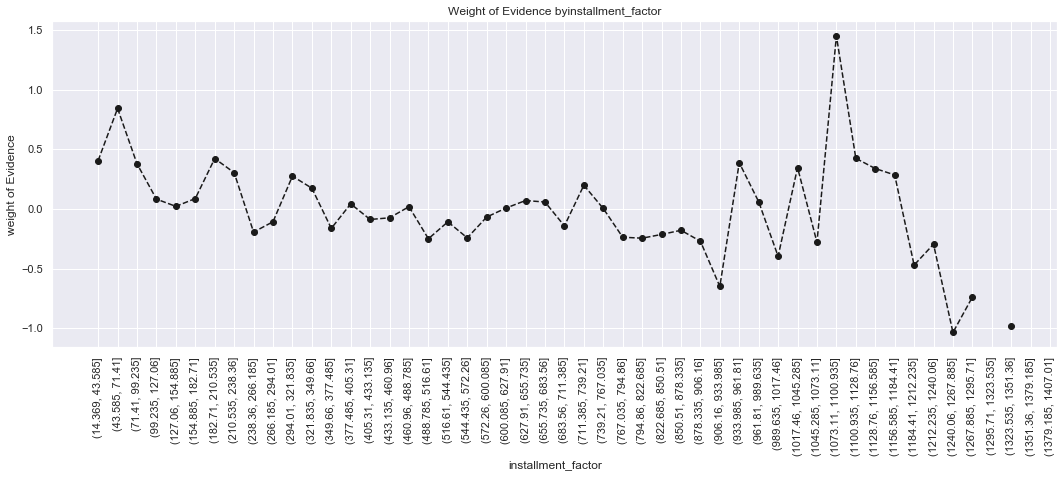

In [310]:
plot_by_woe(df_temp,90)

In [311]:
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'],100)
df_temp = woe_ordered_continuous(df_inputs_prepr,'annual_inc_factor',df_targets_prepr)
df_temp

D:\Program Files\Anaconda3\lib\site-packages\pandas\core\algorithms.py:1819: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-2695.2, 79752.0]",62621,0.980566,0.671488,61404.0,1217.0,0.670818,0.707147,-0.052741,NaN,NaN,inf
1,"(79752.0, 154704.0]",26582,0.983711,0.285040,26149.0,433.0,0.285669,0.251598,0.127002,0.003145,0.179742,inf
2,"(154704.0, 229656.0]",2916,0.982510,0.031268,2865.0,51.0,0.031299,0.029634,0.054671,0.001200,0.072331,inf
3,"(229656.0, 304608.0]",710,0.980282,0.007613,696.0,14.0,0.007604,0.008135,-0.067534,0.002229,0.122206,inf
4,"(304608.0, 379560.0]",171,0.988304,0.001834,169.0,2.0,0.001846,0.001162,0.462925,0.008022,0.530459,inf
5,"(379560.0, 454512.0]",111,0.981982,0.001190,109.0,2.0,0.001191,0.001162,0.024374,0.006322,0.438551,inf
6,"(454512.0, 529464.0]",53,1.000000,0.000568,53.0,0.0,0.000579,0.000000,inf,0.018018,inf,inf
7,"(529464.0, 604416.0]",33,1.000000,0.000354,33.0,0.0,0.000361,0.000000,inf,0.000000,NaN,inf
8,"(604416.0, 679368.0]",10,1.000000,0.000107,10.0,0.0,0.000109,0.000000,inf,0.000000,NaN,inf
9,"(679368.0, 754320.0]",13,0.923077,0.000139,12.0,1.0,0.000131,0.000581,-1.488920,0.076923,inf,inf


In [312]:
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['annual_inc']<=140000,:]

In [313]:
df_inputs_prepr_temp['annual_inc_factor'] = pd.cut(df_inputs_prepr_temp['annual_inc'],50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp,'annual_inc_factor',df_targets_prepr[df_inputs_prepr_temp.index])
df_temp

D:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(4664.8, 7504.0]",10,1.000000,0.000114,10.0,0.0,0.000116,0.000000,inf,NaN,NaN,inf
1,"(7504.0, 10208.0]",84,0.964286,0.000958,81.0,3.0,0.000941,0.001847,-0.674397,0.035714,inf,inf
2,"(10208.0, 12912.0]",123,0.959350,0.001403,118.0,5.0,0.001371,0.003079,-0.808987,0.004936,0.134590,inf
3,"(12912.0, 15616.0]",304,0.973684,0.003467,296.0,8.0,0.003439,0.004926,-0.359316,0.014335,0.449671,inf
4,"(15616.0, 18320.0]",383,0.981723,0.004368,376.0,7.0,0.004369,0.004310,0.013445,0.008039,0.372761,inf
5,"(18320.0, 21024.0]",733,0.969986,0.008359,711.0,22.0,0.008261,0.013547,-0.494604,0.011737,0.508049,inf
6,"(21024.0, 23728.0]",704,0.971591,0.008028,684.0,20.0,0.007947,0.012315,-0.438008,0.001605,0.056596,inf
7,"(23728.0, 26432.0]",1785,0.982073,0.020356,1753.0,32.0,0.020368,0.019704,0.033114,0.010482,0.471122,inf
8,"(26432.0, 29136.0]",1355,0.983764,0.015452,1333.0,22.0,0.015488,0.013547,0.133911,0.001691,0.100797,inf
9,"(29136.0, 31840.0]",2292,0.979930,0.026137,2246.0,46.0,0.026096,0.028325,-0.081969,0.003834,0.215880,inf


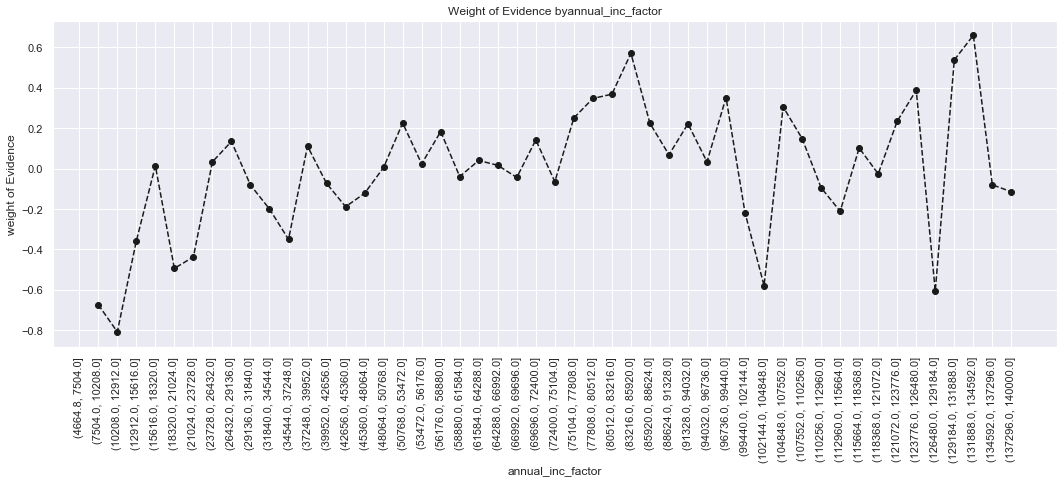

In [314]:
plot_by_woe(df_temp,90)

In [315]:
df_inputs_prepr['annual_inc:<20K'] = np.where((df_inputs_prepr['annual_inc'] <= 20000), 1, 0)
df_inputs_prepr['annual_inc:20K-30K'] = np.where((df_inputs_prepr['annual_inc'] > 20000) & (df_inputs_prepr['annual_inc'] <= 30000), 1, 0)
df_inputs_prepr['annual_inc:30K-40K'] = np.where((df_inputs_prepr['annual_inc'] > 30000) & (df_inputs_prepr['annual_inc'] <= 40000), 1, 0)
df_inputs_prepr['annual_inc:40K-50K'] = np.where((df_inputs_prepr['annual_inc'] > 40000) & (df_inputs_prepr['annual_inc'] <= 50000), 1, 0)
df_inputs_prepr['annual_inc:50K-60K'] = np.where((df_inputs_prepr['annual_inc'] > 50000) & (df_inputs_prepr['annual_inc'] <= 60000), 1, 0)
df_inputs_prepr['annual_inc:60K-70K'] = np.where((df_inputs_prepr['annual_inc'] > 60000) & (df_inputs_prepr['annual_inc'] <= 70000), 1, 0)
df_inputs_prepr['annual_inc:70K-80K'] = np.where((df_inputs_prepr['annual_inc'] > 70000) & (df_inputs_prepr['annual_inc'] <= 80000), 1, 0)
df_inputs_prepr['annual_inc:80K-90K'] = np.where((df_inputs_prepr['annual_inc'] > 80000) & (df_inputs_prepr['annual_inc'] <= 90000), 1, 0)
df_inputs_prepr['annual_inc:90K-100K'] = np.where((df_inputs_prepr['annual_inc'] > 90000) & (df_inputs_prepr['annual_inc'] <= 100000), 1, 0)
df_inputs_prepr['annual_inc:100K-120K'] = np.where((df_inputs_prepr['annual_inc'] > 100000) & (df_inputs_prepr['annual_inc'] <= 120000), 1, 0)
df_inputs_prepr['annual_inc:120K-140K'] = np.where((df_inputs_prepr['annual_inc'] > 120000) & (df_inputs_prepr['annual_inc'] <= 140000), 1, 0)
df_inputs_prepr['annual_inc:>140K'] = np.where((df_inputs_prepr['annual_inc'] > 140000), 1, 0)

In [316]:
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_delinq'])]
df_inputs_prepr_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_delinq'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_delinq_factor', df_targets_prepr[df_inputs_prepr_temp.index])
df_temp

D:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Program Files\Anaconda3\lib\site-packages\pandas\core\algorithms.py:1819: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


,mths_since_last_delinq_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.17, 3.4]",1348,0.956973,0.031283,1290.0,58.0,0.030569,0.065022,-0.754731,NaN,NaN,inf
1,"(3.4, 6.8]",1890,0.971429,0.043861,1836.0,54.0,0.043508,0.060538,-0.330325,0.014455,0.424406,inf
2,"(6.8, 10.2]",3373,0.975986,0.078276,3292.0,81.0,0.078011,0.090807,-0.151884,0.004557,0.178441,inf
3,"(10.2, 13.6]",2496,0.978766,0.057924,2443.0,53.0,0.057892,0.059417,-0.025996,0.002780,0.125889,inf
4,"(13.6, 17.0]",3165,0.973144,0.073449,3080.0,85.0,0.072988,0.095291,-0.266652,0.005622,0.240657,inf
5,"(17.0, 20.4]",2282,0.978966,0.052958,2234.0,48.0,0.052940,0.053812,-0.016338,0.005822,0.250314,inf
6,"(20.4, 23.8]",2115,0.982979,0.049082,2079.0,36.0,0.049267,0.040359,0.199438,0.004013,0.215775,inf
7,"(23.8, 27.2]",2755,0.984029,0.063934,2711.0,44.0,0.064243,0.049327,0.264198,0.001050,0.064760,inf
8,"(27.2, 30.6]",1929,0.984966,0.044766,1900.0,29.0,0.045025,0.032511,0.325628,0.000937,0.061430,inf
9,"(30.6, 34.0]",2453,0.978801,0.056926,2401.0,52.0,0.056897,0.058296,-0.024289,0.006165,0.349916,inf


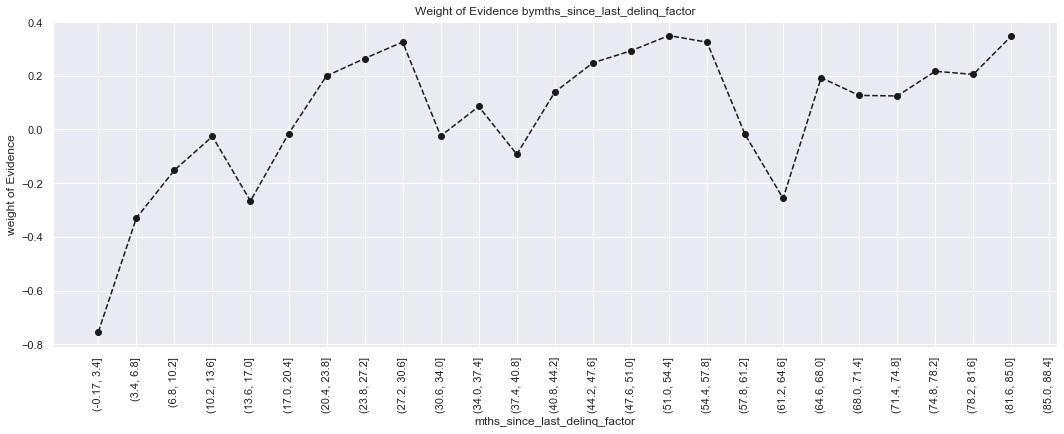

In [317]:
plot_by_woe(df_temp,90)

In [318]:
df_inputs_prepr['mths_since_last_delinq:Missing'] = np.where((df_inputs_prepr['mths_since_last_delinq'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_delinq:0-3'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 0) & (df_inputs_prepr['mths_since_last_delinq'] <= 3), 1, 0)
df_inputs_prepr['mths_since_last_delinq:4-30'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 4) & (df_inputs_prepr['mths_since_last_delinq'] <= 30), 1, 0)
df_inputs_prepr['mths_since_last_delinq:31-56'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 31) & (df_inputs_prepr['mths_since_last_delinq'] <= 56), 1, 0)
df_inputs_prepr['mths_since_last_delinq:>=57'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 57), 1, 0)

In [319]:
df_inputs_prepr['dti_factor'] = pd.cut(df_inputs_prepr['dti'], 100)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'dti_factor', df_targets_prepr)
df_temp

,dti_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.04, 0.4]",187,0.957219,0.002005,179.0,8.0,0.001956,0.004648,-0.865883,NaN,NaN,inf
1,"(0.4, 0.8]",184,0.989130,0.001973,182.0,2.0,0.001988,0.001162,0.537033,0.031911,1.402915,inf
2,"(0.8, 1.2]",223,0.986547,0.002391,220.0,3.0,0.002403,0.001743,0.321188,0.002583,0.215844,inf
3,"(1.2, 1.6]",255,0.984314,0.002734,251.0,4.0,0.002742,0.002324,0.165332,0.002233,0.155857,inf
4,"(1.6, 2.0]",315,0.980952,0.003378,309.0,6.0,0.003376,0.003486,-0.032245,0.003361,0.197577,inf
5,"(2.0, 2.399]",324,0.993827,0.003474,322.0,2.0,0.003518,0.001162,1.107578,0.012875,1.139823,inf
6,"(2.399, 2.799]",366,0.991803,0.003925,363.0,3.0,0.003966,0.001743,0.821964,0.002024,0.285614,inf
7,"(2.799, 3.199]",442,0.981900,0.004740,434.0,8.0,0.004741,0.004648,0.019776,0.009903,0.802188,inf
8,"(3.199, 3.599]",484,0.983471,0.005190,476.0,8.0,0.005200,0.004648,0.112149,0.001571,0.092373,inf
9,"(3.599, 3.999]",563,0.989343,0.006037,557.0,6.0,0.006085,0.003486,0.556979,0.005872,0.444829,inf


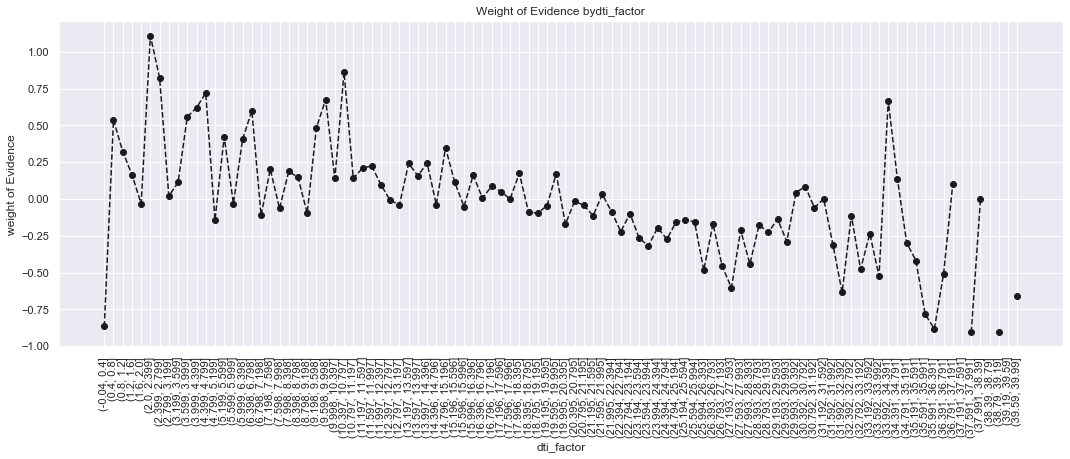

In [320]:
plot_by_woe(df_temp,90)

In [321]:
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['dti'] <= 35, : ]
df_inputs_prepr_temp['dti_factor'] = pd.cut(df_inputs_prepr_temp['dti'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'dti_factor', df_targets_prepr[df_inputs_prepr_temp.index])
df_temp

D:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,dti_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.035, 0.7]",328,0.972561,0.003544,319.0,9.0,0.003511,0.005288,-0.409395,NaN,NaN,0.056265
1,"(0.7, 1.4]",393,0.979644,0.004246,385.0,8.0,0.004238,0.004700,-0.103560,0.007083,0.305835,0.056265
2,"(1.4, 2.1]",536,0.988806,0.005792,530.0,6.0,0.005834,0.003525,0.503756,0.009162,0.607316,0.056265
3,"(2.1, 2.8]",607,0.991763,0.006559,602.0,5.0,0.006627,0.002938,0.813458,0.002957,0.309702,0.056265
4,"(2.8, 3.5]",811,0.981504,0.008763,796.0,15.0,0.008762,0.008813,-0.005813,0.010258,0.819271,0.056265
5,"(3.5, 4.2]",970,0.987629,0.010481,958.0,12.0,0.010545,0.007051,0.402579,0.006125,0.408392,0.056265
6,"(4.2, 4.9]",1140,0.991228,0.012318,1130.0,10.0,0.012439,0.005875,0.750026,0.003599,0.347447,0.056265
7,"(4.9, 5.6]",1370,0.983942,0.014803,1348.0,22.0,0.014838,0.012926,0.137973,0.007286,0.612053,0.056265
8,"(5.6, 6.3]",1491,0.983233,0.016111,1466.0,25.0,0.016137,0.014689,0.094055,0.000709,0.043918,0.056265
9,"(6.3, 7.0]",1722,0.988966,0.018607,1703.0,19.0,0.018746,0.011163,0.518346,0.005734,0.424291,0.056265


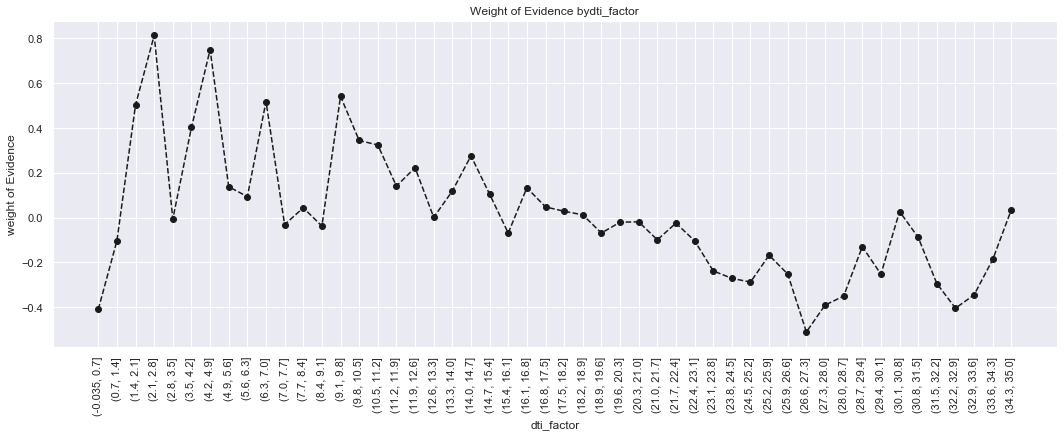

In [322]:
plot_by_woe(df_temp, 90)

In [323]:
df_inputs_prepr['dti:<=1.4'] = np.where((df_inputs_prepr['dti'] <= 1.4), 1, 0)
df_inputs_prepr['dti:1.4-3.5'] = np.where((df_inputs_prepr['dti'] > 1.4) & (df_inputs_prepr['dti'] <= 3.5), 1, 0)
df_inputs_prepr['dti:3.5-7.7'] = np.where((df_inputs_prepr['dti'] > 3.5) & (df_inputs_prepr['dti'] <= 7.7), 1, 0)
df_inputs_prepr['dti:7.7-10.5'] = np.where((df_inputs_prepr['dti'] > 7.7) & (df_inputs_prepr['dti'] <= 10.5), 1, 0)
df_inputs_prepr['dti:10.5-16.1'] = np.where((df_inputs_prepr['dti'] > 10.5) & (df_inputs_prepr['dti'] <= 16.1), 1, 0)
df_inputs_prepr['dti:16.1-20.3'] = np.where((df_inputs_prepr['dti'] > 16.1) & (df_inputs_prepr['dti'] <= 20.3), 1, 0)
df_inputs_prepr['dti:20.3-21.7'] = np.where((df_inputs_prepr['dti'] > 20.3) & (df_inputs_prepr['dti'] <= 21.7), 1, 0)
df_inputs_prepr['dti:21.7-22.4'] = np.where((df_inputs_prepr['dti'] > 21.7) & (df_inputs_prepr['dti'] <= 22.4), 1, 0)
df_inputs_prepr['dti:22.4-35'] = np.where((df_inputs_prepr['dti'] > 22.4) & (df_inputs_prepr['dti'] <= 35), 1, 0)
df_inputs_prepr['dti:>35'] = np.where((df_inputs_prepr['dti'] > 35), 1, 0)

In [324]:
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_record'])]
df_inputs_prepr_temp['mths_since_last_record_factor'] = pd.cut(df_inputs_prepr_temp['mths_since_last_record'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_record_factor', df_targets_prepr[df_inputs_prepr_temp.index])
df_temp

D:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,mths_since_last_record_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.129, 2.58]",244,0.860656,0.019410,210.0,34.0,0.017098,0.117647,-1.928716,NaN,NaN,inf
1,"(2.58, 5.16]",36,0.944444,0.002864,34.0,2.0,0.002768,0.006920,-0.916250,0.083789,1.012466,inf
2,"(5.16, 7.74]",39,0.948718,0.003102,37.0,2.0,0.003013,0.006920,-0.831693,0.004274,0.084557,inf
3,"(7.74, 10.32]",66,1.000000,0.005250,66.0,0.0,0.005374,0.000000,inf,0.051282,inf,inf
4,"(10.32, 12.9]",42,0.928571,0.003341,39.0,3.0,0.003175,0.010381,-1.184514,0.071429,inf,inf
5,"(12.9, 15.48]",69,0.956522,0.005489,66.0,3.0,0.005374,0.010381,-0.658421,0.027950,0.526093,inf
6,"(15.48, 18.06]",95,0.978947,0.007557,93.0,2.0,0.007572,0.006920,0.089989,0.022426,0.748410,inf
7,"(18.06, 20.64]",58,0.982759,0.004614,57.0,1.0,0.004641,0.003460,0.293588,0.003811,0.203599,inf
8,"(20.64, 23.22]",101,0.980198,0.008034,99.0,2.0,0.008061,0.006920,0.152509,0.002561,0.141079,inf
9,"(23.22, 25.8]",94,0.978723,0.007478,92.0,2.0,0.007491,0.006920,0.079178,0.001475,0.073331,inf


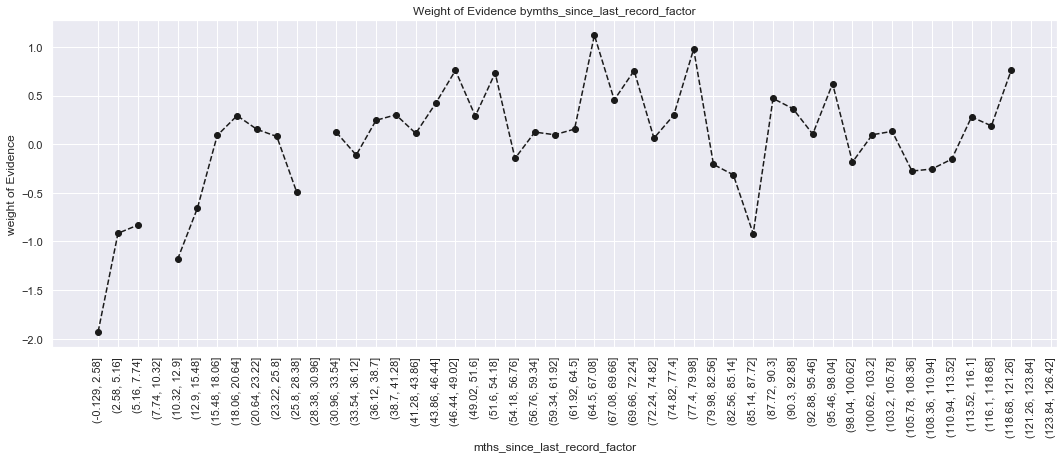

In [325]:
plot_by_woe(df_temp, 90)

In [326]:
df_inputs_prepr['mths_since_last_record:Missing'] = np.where((df_inputs_prepr['mths_since_last_record'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_record:0-2'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 0) & (df_inputs_prepr['mths_since_last_record'] <= 2), 1, 0)
df_inputs_prepr['mths_since_last_record:3-20'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 3) & (df_inputs_prepr['mths_since_last_record'] <= 20), 1, 0)
df_inputs_prepr['mths_since_last_record:21-31'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 21) & (df_inputs_prepr['mths_since_last_record'] <= 31), 1, 0)
df_inputs_prepr['mths_since_last_record:32-80'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 32) & (df_inputs_prepr['mths_since_last_record'] <= 80), 1, 0)
df_inputs_prepr['mths_since_last_record:81-86'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 81) & (df_inputs_prepr['mths_since_last_record'] <= 86), 1, 0)
df_inputs_prepr['mths_since_last_record:>86'] = np.where((df_inputs_prepr['mths_since_last_record'] > 86), 1, 0)

##Preprocessing the test data

In [236]:
#loan_data_inputs_train = df_inputs_prepr
loan_data_inputs_test = df_inputs_prepr

In [327]:
loan_data_inputs_train.to_csv('loan_data_inputs_train.csv')
loan_data_targets_train.to_csv('loan_data_targets_train.csv')
loan_data_inputs_test.to_csv('loan_data_inputs_test.csv')
loan_data_targets_test.to_csv('loan_data_targets_test.csv')

D:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  
D:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  after removing the cwd from sys.path.
